# Technical analysis MHI version 2_5

In [6]:
import pandas as pd
import math
import numpy as np
import datetime as dt
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as TA
from mpl_finance import candlestick2_ohlc
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from datetime import datetime
%matplotlib inline

In [7]:
pd.options.mode.chained_assignment = None

In [8]:
from mpl_finance import candlestick2_ohlc

## Data importing and data processing

In [11]:
df=pd.read_csv("C:/Users/Fevaworks/Downloads/mhi_2019dec.csv")

In [12]:
df.head()

,Unnamed: 0,Date,High,Low,Open,Close,Volume
0,0,2019-06-03 09:10:00,26765.0,26753.0,26764.0,26757.0,NaN
1,1,2019-06-03 09:15:00,26777.0,26726.0,26764.0,26748.0,NaN
2,2,2019-06-03 09:20:00,26767.0,26728.0,26749.0,26754.0,NaN
3,3,2019-06-03 09:25:00,26808.0,26754.0,26754.0,26784.0,NaN
4,4,2019-06-03 09:30:00,26794.0,26701.0,26783.0,26704.0,NaN


In [13]:
# Data Cleaning

df=df.drop(["Unnamed: 0"],axis=1)
df["ID"]=range(len(df))
df["Date"]=pd.to_datetime(df["Date"],format="%Y/%m/%d %H:%M:%S")
df.index=df["Date"]
df["Date1"]=df["Date"].dt.date
df["Date1"]=pd.to_datetime(df["Date1"],format="%Y-%m-%d")
df["Year"]=df["Date"].dt.year
df["Week"]=df["Date"].dt.week
df["Month"]=df["Date"].dt.month
df["hour"]=df["Date"].dt.hour
df["Gap"]=df["Open"]-df["High"].shift()
df["Volatility"]=df["High"]-df["Low"]
df["Return"]=df["Close"]-df["Open"].shift()
# Appending TA
df["EMA9"]=TA.EMA(df["Close"],9)
df["EMA19"]=TA.EMA(df["Close"],19)
df["EMA50"]=TA.EMA(df["Close"],50)
df["ADX"]=TA.ADX(df["High"],df["Low"],df["Close"])
df["DMI+"]=TA.PLUS_DM(df["High"],df["Low"])
df["DMI-"]=TA.MINUS_DM(df["High"],df["Low"])
df["RSI9"]=TA.RSI(df["Close"],9)
df["macd"],df["macdsignal"],df["macdhist"]=TA.MACD(df["Close"],fastperiod=5, slowperiod=34, signalperiod=5)

In [14]:
df.tail()

,Date,High,Low,Open,Close,Volume,ID,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30 11:35:00,2019-12-30 11:35:00,28384.0,28373.0,28384.0,28374.0,104.0,27235,2019-12-30,2019,1,12,11,-12.0,11.0,-16.0,28365.702114,28341.713147,28298.003483,42.915232,82.243324,27.409790,68.011145,59.084135,60.229166,-1.145031
2019-12-30 11:40:00,2019-12-30 11:40:00,28377.0,28370.0,28377.0,28371.0,70.0,27236,2019-12-30,2019,1,12,11,-7.0,7.0,-13.0,28366.761691,28344.641833,28300.866091,43.115083,76.368801,28.451948,65.460500,54.808993,58.422441,-3.613448
2019-12-30 11:45:00,2019-12-30 11:45:00,28374.0,28361.0,28372.0,28361.0,191.0,27237,2019-12-30,2019,1,12,11,-5.0,13.0,-16.0,28365.609353,28346.277649,28303.224284,42.419725,70.913887,35.419666,57.389398,48.315876,55.053586,-6.737710
2019-12-30 11:50:00,2019-12-30 11:50:00,28367.0,28362.0,28363.0,28364.0,53.0,27238,2019-12-30,2019,1,12,11,-11.0,5.0,-8.0,28365.287482,28348.049884,28305.607645,41.774036,65.848609,32.889690,59.091708,44.142757,51.416643,-7.273886
2019-12-30 11:55:00,2019-12-30 11:55:00,28374.0,28360.0,28363.0,28372.0,56.0,27239,2019-12-30,2019,1,12,11,-4.0,14.0,9.0,28366.629986,28350.444896,28308.211267,41.512004,68.145137,30.540426,63.469885,42.888363,48.573883,-5.685520


In [15]:
df.shape

(27240, 25)

In [16]:
# Convert 5m data to 1d data

df_daily=df.groupby(["Date1"]).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'})
df_daily["Date"]=df_daily.index
df_daily.head()

,Open,High,Low,Close,Date
Date1,,,,,
2019-06-03,26764.0,26878.0,26578.0,26818.0,2019-06-03
2019-06-04,26817.0,26886.0,26505.0,26847.0,2019-06-04
2019-06-05,26847.0,27004.0,26663.0,26711.0,2019-06-05
2019-06-06,26709.0,26879.0,26676.0,26808.0,2019-06-06
2019-06-07,26805.0,26820.0,26791.0,26808.0,2019-06-07


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


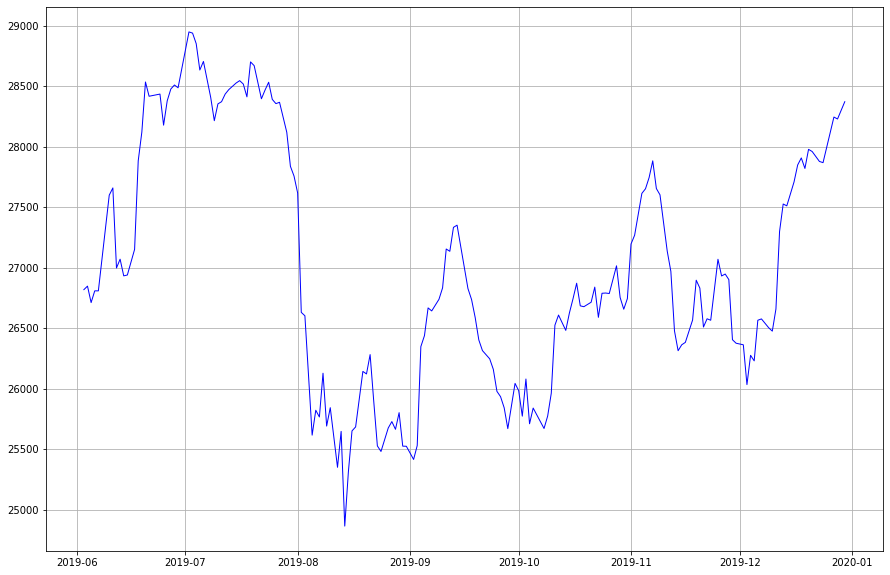

In [17]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_daily["Date"],df_daily["Close"],color="blue",label="Close",linewidth=1)
ax.grid(True)
plt.show()

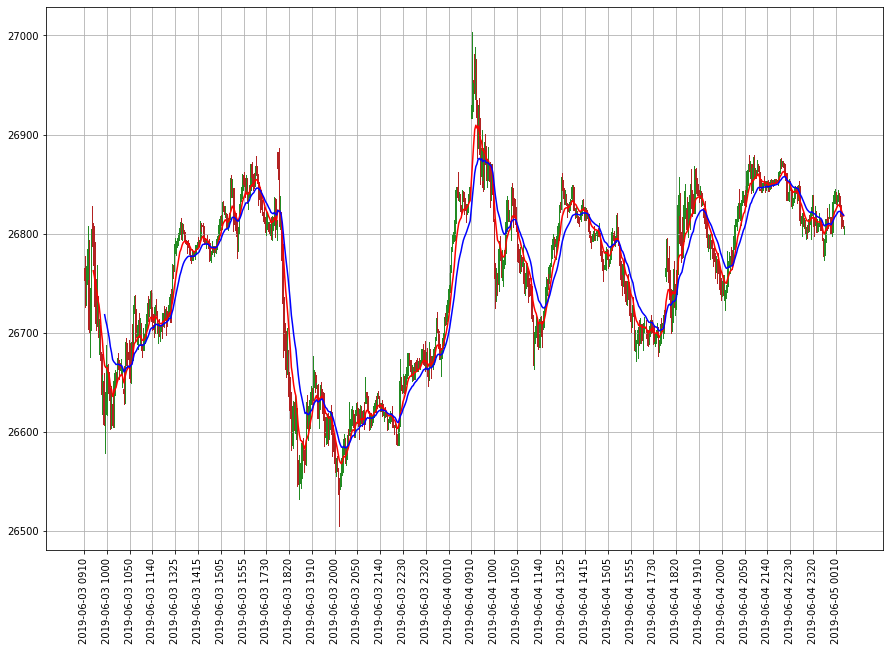

In [18]:
data1=df.loc["2019-06-03":"2019-06-06"].copy()
data1["ID"]=range(len(data1))
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data1.index),20))
ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H%M"))

candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
ax4.plot(data1["ID"],data1["EMA9"],color="red")
ax4.plot(data1["ID"],data1["EMA19"],color="blue")
ax4.grid(True)
plt.xticks(rotation=90)
plt.show()

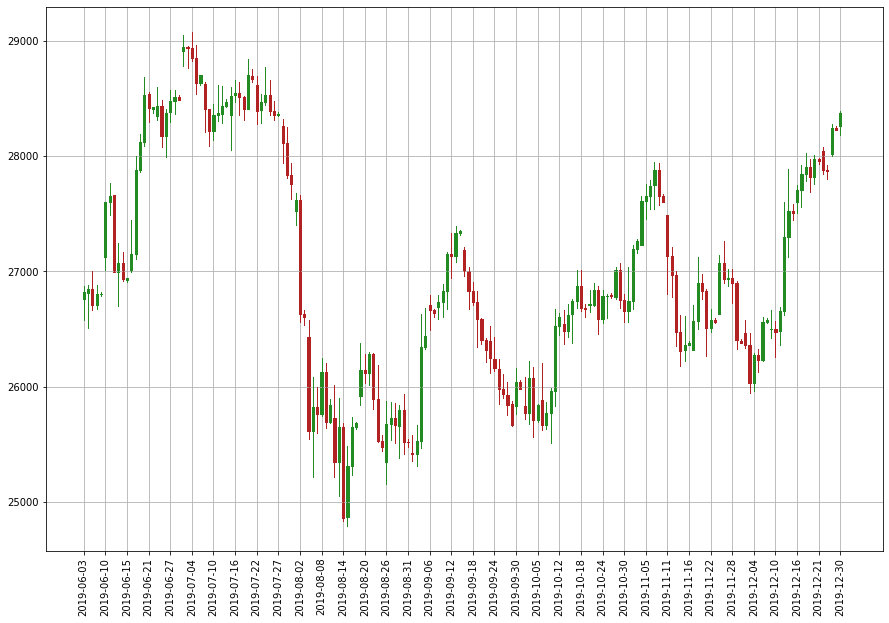

In [19]:
data1=df_daily.copy()
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data1.index),5))
ax4.set_xticklabels(data1.index[::5].strftime("%Y-%m-%d"))

candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
ax4.grid(True)
plt.xticks(rotation=90)
plt.show()

In [20]:
df.tail()

,Date,High,Low,Open,Close,Volume,ID,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30 11:35:00,2019-12-30 11:35:00,28384.0,28373.0,28384.0,28374.0,104.0,27235,2019-12-30,2019,1,12,11,-12.0,11.0,-16.0,28365.702114,28341.713147,28298.003483,42.915232,82.243324,27.409790,68.011145,59.084135,60.229166,-1.145031
2019-12-30 11:40:00,2019-12-30 11:40:00,28377.0,28370.0,28377.0,28371.0,70.0,27236,2019-12-30,2019,1,12,11,-7.0,7.0,-13.0,28366.761691,28344.641833,28300.866091,43.115083,76.368801,28.451948,65.460500,54.808993,58.422441,-3.613448
2019-12-30 11:45:00,2019-12-30 11:45:00,28374.0,28361.0,28372.0,28361.0,191.0,27237,2019-12-30,2019,1,12,11,-5.0,13.0,-16.0,28365.609353,28346.277649,28303.224284,42.419725,70.913887,35.419666,57.389398,48.315876,55.053586,-6.737710
2019-12-30 11:50:00,2019-12-30 11:50:00,28367.0,28362.0,28363.0,28364.0,53.0,27238,2019-12-30,2019,1,12,11,-11.0,5.0,-8.0,28365.287482,28348.049884,28305.607645,41.774036,65.848609,32.889690,59.091708,44.142757,51.416643,-7.273886
2019-12-30 11:55:00,2019-12-30 11:55:00,28374.0,28360.0,28363.0,28372.0,56.0,27239,2019-12-30,2019,1,12,11,-4.0,14.0,9.0,28366.629986,28350.444896,28308.211267,41.512004,68.145137,30.540426,63.469885,42.888363,48.573883,-5.685520


In [21]:
# To show a date 5m graph

def chart1(Date2):
    Date2_1=datetime.strptime(Date2,"%Y-%m-%d %H:%M")
    time3=pd.Timestamp(Date2_1.date()+dt.timedelta(days=1)).strftime("%Y-%m-%d %H:%M")

    data1=df.loc[Date2:time3].copy()
    data1["ID"]=range(len(data1))
    f1, ax4 = plt.subplots(figsize = (15,10))

    ax4.set_xticks(range(0, len(data1.index),10))
    ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H%M"))

    candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
#     ax4.plot(data1["ID"],data1["EMA9"],color="red")
#     ax4.plot(data1["ID"],data1["EMA19"],color="blue")
    ax4.grid(True)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
# To show a date-date 5m graph

def chart2(Date1,Date2):
    
    data1=df.loc[Date1:Date2].copy()
    data1["ID"]=range(len(data1))
    f1, ax4 = plt.subplots(figsize = (15,10))

    ax4.set_xticks(range(0, len(data1.index),10))
    ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H%M"))

    candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
#     ax4.plot(data1["ID"],data1["EMA9"],color="red")
#     ax4.plot(data1["ID"],data1["EMA19"],color="blue")
    ax4.grid(True)
    plt.xticks(rotation=90)
    plt.show()

## To check the performance of the EMA crossover(UP)

In [23]:
def cross_over_up(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])>0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)
def cross_over_down(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])<0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [31]:
EMA_crossoverup=cross_over_up(df,"EMA9","EMA19");EMA_crossoverup.describe()

count    27240.000000
mean         0.024046
std          0.153193
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

In [32]:
# count how many 1
EMA_crossoverup.sum()

655

In [33]:
df["EMA_crossoverup"]=EMA_crossoverup

### Number of crossoverup event per date

In [34]:
# Check each day, how many cross overup a day
df.groupby("Date1")["EMA_crossoverup"].sum()

Date1
2019-06-03    2
2019-06-04    4
2019-06-05    3
2019-06-06    3
2019-06-07    0
2019-06-10    6
2019-06-11    4
2019-06-12    4
2019-06-13    3
2019-06-14    6
2019-06-15    0
2019-06-17    4
2019-06-18    6
2019-06-19    4
2019-06-20    4
2019-06-21    5
2019-06-22    1
2019-06-24    6
2019-06-25    5
2019-06-26    6
2019-06-27    3
2019-06-28    3
2019-06-29    1
2019-07-02    4
2019-07-03    5
2019-07-04    4
2019-07-05    4
2019-07-06    0
2019-07-08    2
2019-07-09    6
2019-07-10    4
2019-07-11    6
2019-07-12    3
2019-07-13    1
2019-07-15    6
2019-07-16    5
2019-07-17    3
2019-07-18    3
2019-07-19    6
2019-07-20    2
2019-07-22    3
2019-07-23    8
2019-07-24    4
2019-07-25    4
2019-07-26    7
2019-07-27    2
2019-07-29    3
2019-07-30    4
2019-07-31    2
2019-08-01    4
2019-08-02    3
2019-08-03    2
2019-08-05    2
2019-08-06    4
2019-08-07    3
2019-08-08    4
2019-08-09    5
2019-08-10    1
2019-08-12    3
2019-08-13    3
2019-08-14    2
2019-08-15    4
20

In [35]:
df["MAX"]=np.nan
df["MIN"]=np.nan

Here we will check the maximum possible profit which could be achieved if day trading is performed (i.e. the trade will be ended by the end of that day of entry.)


In [36]:
for i in range(len(df)):
    if df.iloc[i,:]["EMA_crossoverup"]==1:
        date2=df.iloc[i,:]["Date"]
        date3=date2.date()+dt.timedelta(days=1)    
        df2=df[(df["Date"]>date2) & (df["Date"]<pd.Timestamp(date3))]
        max1=df2["Close"].max()
        min1=df2["Close"].min()
        df["MAX"].iloc[i]=max1
        df["MIN"].iloc[i]=min1
        
        
        
    

In [40]:
df[df["EMA_crossoverup"]==1].head()

,Date,High,Low,Open,Close,Volume,ID,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist,EMA_crossoverup,MAX,MIN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-03 13:30:00,2019-06-03 13:30:00,26691.0,26649.0,26653.0,26686.0,NaN,41,2019-06-03,2019,23,6,13,-37.0,42.0,13.0,26667.820980,26667.093097,NaN,16.891380,80.558889,87.224955,58.001499,-7.554455,-13.190932,5.636477,1,26869.0,26675.0
2019-06-03 20:35:00,2019-06-03 20:35:00,26798.0,26788.0,26794.0,26797.0,NaN,117,2019-06-03,2019,23,6,20,-1.0,10.0,13.0,26788.174656,26787.222775,26772.304688,14.176671,41.550644,30.239631,60.987287,8.342148,6.138009,2.204139,1,26869.0,26798.0
2019-06-04 09:10:00,2019-06-04 09:10:00,26882.0,26855.0,26882.0,26866.0,NaN,170,2019-06-04,2019,23,6,9,68.0,27.0,61.0,26823.757700,26823.433062,26820.726988,13.602744,112.144507,46.319397,67.883548,5.925444,-4.901555,10.826999,1,26847.0,26545.0
2019-06-04 11:50:00,2019-06-04 11:50:00,26662.0,26645.0,26657.0,26658.0,NaN,202,2019-06-04,2019,23,6,11,-19.0,17.0,25.0,26630.778950,26628.724992,26681.294129,29.251712,103.667028,82.661126,62.408092,-11.633888,-28.586136,16.952248,1,26847.0,26545.0
2019-06-04 15:20:00,2019-06-04 15:20:00,26630.0,26597.0,26597.0,26611.0,NaN,233,2019-06-04,2019,23,6,15,-6.0,33.0,14.0,26588.963747,26588.587603,26617.732399,24.684425,91.153147,76.287634,62.750343,-4.598598,-15.298412,10.699814,1,26847.0,26587.0


In [82]:
df1= df[df["EMA_crossoverup"]==1][["Close","MAX"]]; df1.head()

,Close,MAX
Date,,
2019-06-03 13:30:00,26686.0,26869.0
2019-06-03 20:35:00,26797.0,26869.0
2019-06-04 09:10:00,26866.0,26847.0
2019-06-04 11:50:00,26658.0,26847.0
2019-06-04 15:20:00,26611.0,26847.0


In [85]:
df1["Return"] = df1["MAX"] - df1["Close"]

In [86]:
(df1["MAX"] - df1["Close"]).describe()

count    648.000000
mean     100.966049
std      145.541144
min      -71.000000
25%       14.000000
50%       55.000000
75%      124.000000
max      984.000000
dtype: float64

In [87]:
# Earning Money
df1[df1["Return"] > 0]

,Close,MAX,Return
Date,,,
2019-06-03 13:30:00,26686.0,26869.0,183.0
2019-06-03 20:35:00,26797.0,26869.0,72.0
2019-06-04 11:50:00,26658.0,26847.0,189.0
2019-06-04 15:20:00,26611.0,26847.0,236.0
2019-06-04 19:50:00,26645.0,26847.0,202.0
2019-06-05 13:00:00,26846.0,26856.0,10.0
2019-06-05 15:45:00,26766.0,26856.0,90.0
2019-06-06 09:10:00,26763.0,26871.0,108.0
2019-06-06 15:10:00,26806.0,26871.0,65.0


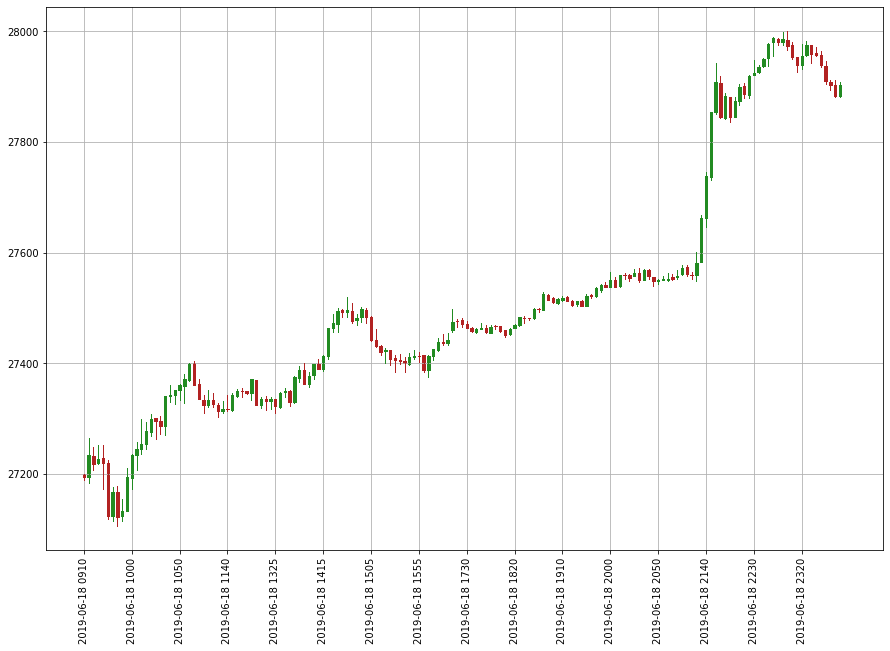

In [89]:
chart1("2019-06-18 09:10")

In [91]:
## Shooting Star
Shooting_star=TA.CDLSHOOTINGSTAR(df["Open"], df["High"], df["Low"], df["Close"])

In [93]:
Shooting_star1=pd.Series(np.where(Shooting_star==-100,1,0),index=Shooting_star.index)
sum(Shooting_star1)

# there is 211 time shooting star occur

211

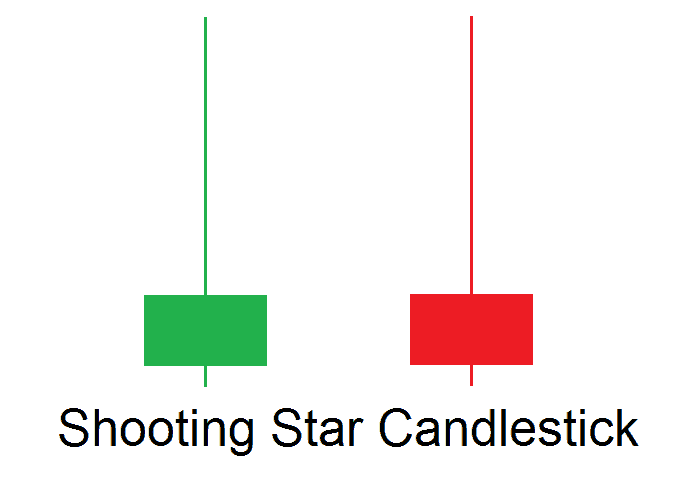

In [90]:
def backtest1(df,amount,stoploss):
    # flag to indicate if the trigger long signal appeared. If yes flag will be changed from zero to one
    flag=0
    flag_long=0
    # flag to indicate if the trigger short signal appeared. 
    flag_short=0
    # flag to indicate if the Enter long signal appeared after the trigger long signal is active. 
    #If yes flag will be changed from zero to one
    flag1=0
    # flag to indicate if the Enter short signal appeared after the trigger long signal is active. 
    #If yes flag will be changed from zero to one
    flag2=0
    #it is the max value of the price of the double peak/double bottom pattern
    price1=np.nan
    #it is the min value of the price of the double peak/double bottom pattern
    price0=np.nan
    # It indicates the price of enter after the trigger signal happened. 
    # For double bottom, enter only happened when the close price is higher than price1 as shown below.
    # For double peak, enter only happened when the close price is lower than price0 as shown below.
    price2=np.nan
    # The profit target used for the backtesting
    Amount=amount
    # The stop loss limit used for the backtesting. 
    # It indicates the value below the enter price (price2)
    Stoploss=stoploss
    # It indicates the date of the trigger of the signal
    date_trigger=np.nan
    # It indicates the next date of the date of enter. It is used to check and ensure day trading is executed.
    date3=np.nan
    # Those are the lists used to log all the entries for the open date,close date,open price, close price of the trade
    trade_type=[]
    trade_triggerdate=[]
    trade_OpenDate=[]
    trade_CloseDate=[]
    trade_OpenPrice=[]
    trade_ClosePrice=[]
    trade_ExitReason=[]
    
    #The trading logic for double bottom
    for i in range(1,len(df)-1):
        #For each of the row, get the datetime and extract the date. 
        #Then add time delta of 9 hours which is then the start datetime for the checking
        # We will then extract the min value of the start of the datetime till the value of the current datetime.
        
        date1=df["Date"].iloc[i]
        Min1=df.loc[pd.Timestamp(date1.date())+dt.timedelta(hours=9):date1]["Close"].min()
        Max1=df.loc[pd.Timestamp(date1.date())+dt.timedelta(hours=9):date1]["Close"].max()
       
        # Now we need to check:
            # If the close price is still below the value of Min1+250. If it already exceed that value it means 
            # The long trend has already been up for quite some time and hence it is too riskly to enter long in such situation
            # if Double bottom signal happens
            # If the time duration is between 0900 till 22:55
        if ((df["Close"].iloc[i]<=Min1+250) & (df["EMA_Crossoverup"].iloc[i]==1) & (flag_long==0)  & (flag_short==0) &
            ((df["Date"].iloc[i].hour>=9) & (df["Date"].iloc[i].hour<23))):            
#        if ((df["Double_Bottom"].iloc[i]==1) & (flag==0) & (df["Date"].iloc[i].hour>=9) ):            
            # If double bottom happend. 
            # Note that no other double bottom signal will be triggered as long as there is an outstanding one (with flag=1)
            price1=max(df["High"].iloc[i],df["High"].iloc[i-1])
            price0=min(df["Low"].iloc[i],df["Low"].iloc[i-1])
            date_trigger=df["Date"].iloc[i]
            #print(type(date_trigger.strftime('%Y-%m-%d')))
            flag_long=1
            continue
        # Now we need to check:
            # If the close price is still below the value of Min1+250. If it already exceed that value it means 
            # The long trend has already been up for quite some time and hence it is too riskly to enter long in such situation
            # if Double bottom signal happens
            # If the time duration is between 0900 till 22:55


        if ((flag_long==1) & (flag1==0) & (flag_short==0) & (flag2==0)):            
            if df["Date"].iloc[i]>=date_trigger.date()+dt.timedelta(days=1):
                flag_long=0
                continue   
#         print(date_trigger)
#         print(df["Date"].iloc[i])
#         print("flag_long="+str(flag_long))
#         print("flag_short="+str(flag_short))


        if ((flag_long==1) & (flag1==0) & (df["Close"].iloc[i]>=price1) & (df["Date"].iloc[i].hour<=23)):
            # Once the trigger signal appeared, it will enter the position if the close price is higher than price1 (the max values)
            # And also if not the day trading condition is violated
            # Set the enter flag to 1 
            flag1=1   
            # It indicates the price used for the enter position. 
            # Here the open price of the next bar will be used for the enter position
            price2=df["Open"].iloc[i+1]
            # It marked the next date once the enter position happened
            date3=df["Date"].iloc[i].date()+dt.timedelta(days=1)
            #It appends the date and the price of the enter position in the trade
            trade_type.append("EMA_Crossoverup")
            trade_triggerdate.append(date_trigger)
            trade_OpenDate.append(df["Date"].iloc[i])
            trade_OpenPrice.append(price2)
            continue      
           
            
        if ((flag1==1) & (flag_long==1)):
            
            # After the trigger event and the enter signal,
            # We need to keep track of the event of the exit
            # Here exit will happened when:
            # The low price falls below the min price values of the double bottom (price0) with stoploss added
            # The close price hits the profit target. (price of enter plus the amount of profit)
            # if double peak happend 
            # if day trade period is gone
        
            if ((df["Date"].iloc[i].hour ==23) | (
                (df["Close"].iloc[i]<=price0-Stoploss) | (df["Close"].iloc[i]>=price2+Amount) | 
                (df["EMA_Crossoverdown"].iloc[i]==1))):
    
                # The open price of next bar will be used for the exit.
                price3=df["Open"].iloc[i+1]
                # Close all the outstanding flags
                flag1=0
                flag_long=0
                date_trigger=np.nan

                # Append the date and the price of the exit
                trade_CloseDate.append(df["Date"].iloc[i])
                trade_ClosePrice.append(price3)
                # To define the exit reason based on the conditions.
                if (df["Close"].iloc[i]<=price0-Stoploss):
                    trade_ExitReason.append("Stop Loss")
                elif (df["Close"].iloc[i]>=price1+Amount):
                    trade_ExitReason.append("Profit Target")
                elif (df["EMA_crossoverdown"].iloc[i]==1):
                    trade_ExitReason.append("EMA_crossoverdown")

                    price1=max(df["High"].iloc[i],df["High"].iloc[i-1])
                    price0=min(df["Low"].iloc[i],df["Low"].iloc[i-1])
                    date_trigger=df["Date"].iloc[i]
                    #print(type(date_trigger.strftime('%Y-%m-%d')))
                    flag_short=1               

                elif (df["Date"].iloc[i].hour==23):
                      trade_ExitReason.append("Day trade limit")
                else:
                    trade_ExitReason.append(np.nan)          
           

            continue
            
    df_trade=pd.DataFrame({"Trade_Type":trade_type,"TriggerDate":trade_triggerdate,"OpenDate":trade_OpenDate,"OpenPrice":
                               trade_OpenPrice,"CloseDate":trade_CloseDate,"ClosePrice":trade_ClosePrice,"ExitReason":trade_ExitReason})
    df_trade["Return"]=np.where(df_trade["Trade_Type"]=="Double_Bottom",df_trade["ClosePrice"]-df_trade["OpenPrice"],
                               df_trade["OpenPrice"]-df_trade["ClosePrice"])
    return(df_trade)